# Halo Tools

__Halotools:__ a community-driven Python package designed to build and test models of the galaxy-halo connection. Halotools provides a modular platform for creating mock universes of galaxies starting from a catalog of dark matter halos obtained from a cosmological simulation. The package supports many of the common forms used to describe galaxy-halo models: the halo occupation distribution (HOD), the conditional luminosity function (CLF), abundance matching, and alternatives to these models that include effects such as environmental quenching or variable galaxy assembly bias. Satellite galaxies can be modeled to live in subhalos, or to follow custom number density profiles within their halos, including spatial and/or velocity bias with respect to the dark matter profile. The package has an optimized toolkit to make mock observations on a synthetic galaxy population, including galaxy clustering, galaxy-galaxy lensing, galaxy group identification, RSD multipoles, void statistics, pairwise velocities and others, allowing direct comparison to observations. Halotools is object-oriented, enabling complex models to be built from a set of simple, interchangeable components, including those of your own creation. Halotools has an automated testing suite and is exhaustively documented on http://halotools.readthedocs.io, which includes quickstart guides, source code notes and a large collection of tutorials. The documentation is effectively an online textbook on how to build and study empirical models of galaxy formation with Python.

* Read the  <a href="https://halotools.readthedocs.io/en/latest/overview.html#halotools-science-overview">science overview</a>
* Here is <a href="https://halotools.readthedocs.io/en/latest/"> the documentation</a>
* <a href="https://halotools.readthedocs.io/en/latest/install.html#step-by-step-install">Installing the package</a>
* Start with the  <a href="https://halotools.readthedocs.io/en/latest/quickstart_and_tutorials/getting_started_overview.html#getting-started">getting started page.</a>
* The <a href="http://adsabs.harvard.edu/abs/2016arXiv160604106H">Halo tools paper by Andrew Hearin.</a>


## Downloading the default catalog

Follow the steps outlined in the getting started page to also download the default halo catalog. 

The default catalog is a $z=0$ snapshot from the <a href="http://hipacc.ucsc.edu/Bolshoi/MergerTrees.html
"> Bolshoi Simulation.</a>

This is a simulation with WMAP5 cosmology with Lbox = 250 Mpc/h and particle mass of ~1e8 Msun/h.

A list of other simulations that are available can be found in the  <a href="https://halotools.readthedocs.io/en/latest/quickstart_and_tutorials/managing_catalogs/supported_sim_list.html#supported-sim-list">simulation page.</a>

Once you have the default halo catalog, let's do the following:

In [ ]:
from halotools.sim_manager import CachedHaloCatalog

In [ ]:
default_halocat = CachedHaloCatalog() 
halocat = CachedHaloCatalog(simname = 'bolshoi', redshift = 0)

Tabular data storing the actual halo information is stored in the `halo_table` attribute:

In [ ]:
# By the way, this is a useful way to see the docstring associated with a given method
?halocat.halo_table()

In [ ]:
# Let's print the list of keys in this halo table
# You should noe be able to understand many of these fields
print((list(halocat.halo_table.keys())))

In [ ]:
# Look at a few values in the catalog
print(halocat.halo_table[0:9])

There is also extensive metadata bound to all cached halo catalogs. For example, the `processing_notes` attribute stores a plain-language description of how the initial halo catalog was reduced:

In [ ]:
print(halocat.processing_notes)

Here is a useful page that tells you about the <a href="https://www.cosmosim.org/cms/documentation/database-structure/tables/rockstar/">columns in Rockstar halo catalogs.</a>

An important one to know about is "pID" : rockstarId of least massive host halo, -1 if it is a distinct halo

* pID= -1 => parent halo
* pID>0   => subhalo


## Downloading a subset of the dark matter particles

The catalog that you downloaded above was a dark matter halo catalog. Let's also download a catalog of randomly downsampled dark matter particles.

Take a look at this method <a href="https://halotools.readthedocs.io/en/latest/api/halotools.sim_manager.DownloadManager.html#halotools.sim_manager.DownloadManager.download_ptcl_table"> download_ptcl_table</a>


In [ ]:
# download_ptcl_table

from halotools.sim_manager import sim_defaults
from halotools.sim_manager import DownloadManager

dman = DownloadManager()
simname = 'bolshoi'
z = 0
version_name = sim_defaults.default_version_name
print(version_name)

dman.download_ptcl_table(simname = 'bolshoi', version_name = version_name, redshift = z,overwrite=True) 

# Check under your directory to see if the particles were downloaded
#/Users/alexie/.astropy/cache/halotools/particle_catalogs/bolshoi

# If for some reason, the download doesnt work, the repeat the same steps with Bolshoi planck instead
#(we can also use Bolshoi plank), use 'bolplanck'

You should see some useful output such as the following:

The particle catalog has been successfully downloaded to the following location:
/Users/alexie/.astropy/cache/halotools/particle_catalogs/bolplanck/hlist_1.00231.particles.halotools_v0p4.hdf5

This filename and its associated metadata have also been added to the Halotools cache log, 
as reflected by a newly added line to the following ASCII file:

/Users/alexie/.astropy/cache/halotools/ptcl_table_cache_log.txt

You can access the particle data with the following syntax:

from halotools.sim_manager import CachedHaloCatalog 
halocat = CachedHaloCatalog(simname = 'bolplanck', version_name = 'halotools_v0p4', redshift = -0.0023)
particles = halocat.ptcl_table 

Mock observable functions such as the galaxy-galaxy lensing signal 
can now be computed for mock galaxies populated into this simulation.

Note that if you move this particle catalog into a new location on disk, 
you must update both the ``fname`` metadata of the hdf5 file 
as well as the``fname`` column of the corresponding entry in the log. 
You can accomplish this with the ``update_cached_file_location``method 
of the PtclTableCache class.

In [9]:
# In principle, this is this is how you access the x,y,z positions of dark matter particles
# However, these seems to be a python 3 issue with this, instead skip to the next cell ...

#from halotools.sim_manager import CachedHaloCatalog 
#halocat = CachedHaloCatalog(simname = 'bolplanck', version_name = 'halotools_v0p4', redshift = -0.0023)
#particles = halocat.ptcl_table 

#px = halocat.ptcl_table['x']
#py = halocat.ptcl_table['y']
#pz = halocat.ptcl_table['z']

In [6]:
# Read in instead this way

from astropy.table import Table

ptcl_table = Table.read('/Users/alexie/.astropy/cache/halotools/particle_catalogs/bolshoi/hlist_1.00035.particles.halotools_v0p4.hdf5',path='data')

px = ptcl_table['x']
py = ptcl_table['y']
pz = ptcl_table['z']


done!


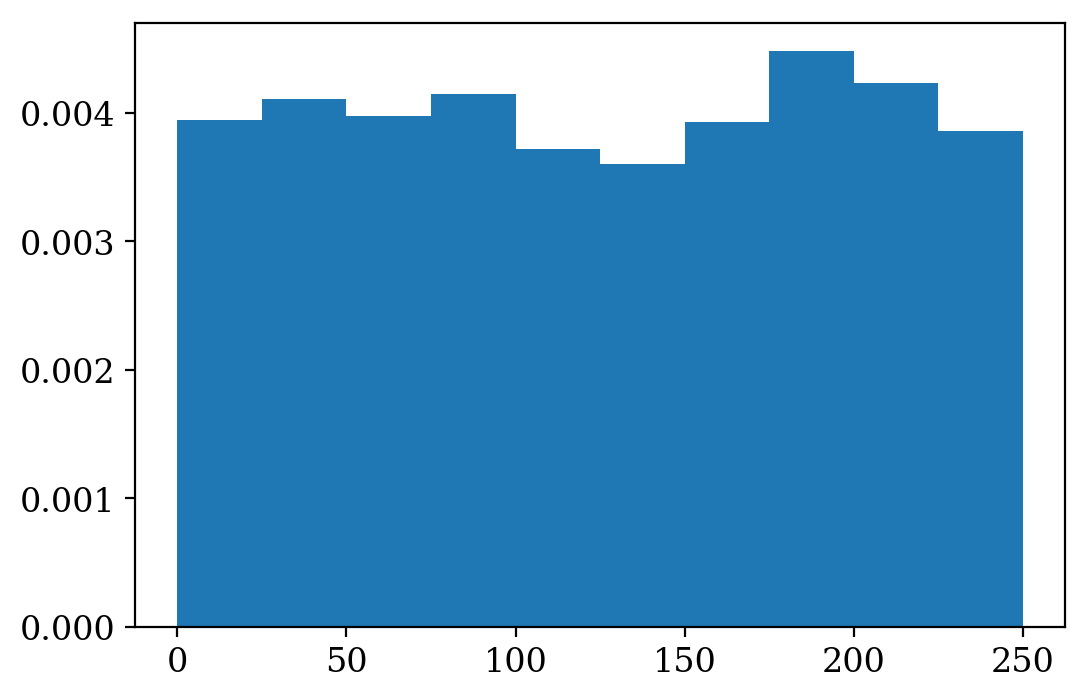

In [8]:
# This is a box with L=250

fig, ax = plt.subplots(1, 1)

__=ax.hist(pz, normed=True)